In [3]:
import numpy as np
import pandas as pd

In [4]:
#데이터 불러오기
data = pd.read_csv('final.csv', encoding='UTF-8')
df = pd.DataFrame(data)
print(df)

          시점  자치구역번호   조출생률  고령인구비율  청년 순이동수           사업체수  문화시설 개수  학원수 (개)  \
0     200802       1  10.01     8.4   2244.0  358446.000000     22.0  11261.0   
1     200803       1   9.73     8.4  -5057.0  358339.000000     22.0  11261.0   
2     200804       1   9.40     8.5  -6978.0  358233.000000     22.0  11261.0   
3     200805       1   8.82     8.5  -8537.0  358126.000000     22.0  11261.0   
4     200806       1   8.60     8.5  -9643.0  358020.000000     22.0  11261.0   
...      ...     ...    ...     ...      ...            ...      ...      ...   
3222  202310      17   4.90    17.8    -26.0   46261.503034      NaN   1212.0   
3223  202311      17   4.30    17.9   -135.0   46921.650802      NaN   1212.0   
3224  202312      17   3.90    17.9   -438.0   47464.123543      NaN   1212.0   
3225  202401      17   5.20    18.0   -761.0   47992.410855      NaN      NaN   
3226  202402      17   5.20    18.1   -546.0   48055.994207      NaN      NaN   

      수강인원 (명)  소멸위험지수   단계

In [5]:
df.isna().sum()

시점            0
자치구역번호        0
조출생률          1
고령인구비율        1
청년 순이동수       1
사업체수          0
문화시설 개수     231
학원수 (개)      16
수강인원 (명)     16
소멸위험지수      442
단계          442
dtype: int64

In [6]:
df.fillna(method='ffill', inplace=True)
df.isna().sum()

df.head()

C:\Users\toler\AppData\Local\Temp\ipykernel_3040\8256680.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,시점,자치구역번호,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수 (개),수강인원 (명),소멸위험지수,단계
0,200802,1,10.01,8.4,2244.0,358446.0,22.0,11261.0,986758.0,2.0452,안정
1,200803,1,9.73,8.4,-5057.0,358339.0,22.0,11261.0,986758.0,2.0452,안정
2,200804,1,9.40,8.5,-6978.0,358233.0,22.0,11261.0,986758.0,2.0452,안정
3,200805,1,8.82,8.5,-8537.0,358126.0,22.0,11261.0,986758.0,2.0452,안정
4,200806,1,8.60,8.5,-9643.0,358020.0,22.0,11261.0,986758.0,2.0452,안정


In [7]:
#KMeans 알고리즘 적용을 위해 StandardScaler 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df.drop(columns=['시점', '자치구역번호','단계','소멸위험지수']))
std_df = pd.DataFrame(std_data, columns=['조출생률','고령인구비율','청년 순이동수','사업체수','문화시설 개수','학원수','수강인원'])
std_df['소멸위험지수'] = df['소멸위험지수']

std_df.head()

,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수,수강인원,소멸위험지수
0,1.149094,-1.451930,0.668671,1.959376,-0.548177,1.469289,0.885573,2.0452
1,1.021104,-1.451930,-1.503220,1.958522,-0.548177,1.469289,0.885573,2.0452
2,0.870258,-1.427877,-2.074677,1.957676,-0.548177,1.469289,0.885573,2.0452
3,0.605136,-1.427877,-2.538446,1.956821,-0.548177,1.469289,0.885573,2.0452
4,0.504573,-1.427877,-2.867457,1.955975,-0.548177,1.469289,0.885573,2.0452


In [8]:
#KMeans를 시각화하기 위해 PCA 사용
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(std_data)
pca_data

array([[ 1.84232766, -2.40508373],
       [ 1.41614404, -1.98736901],
       [ 1.31322882, -1.7834137 ],
       ...,
       [-1.14110543,  1.66479603],
       [-1.20904549,  1.3018519 ],
       [-1.1963573 ,  1.30835206]])

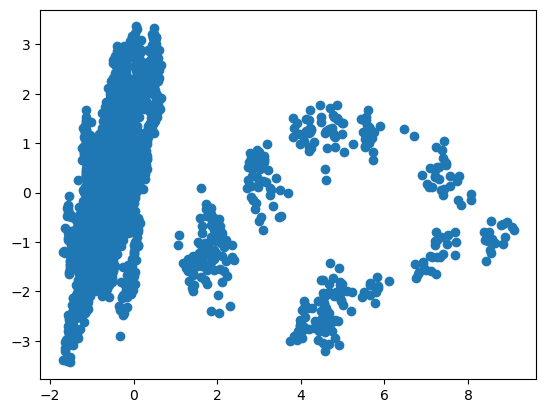

In [9]:
import matplotlib.pyplot as plt

#PCA 결과 출력
df_pca = pd.DataFrame(data = pca_data, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])

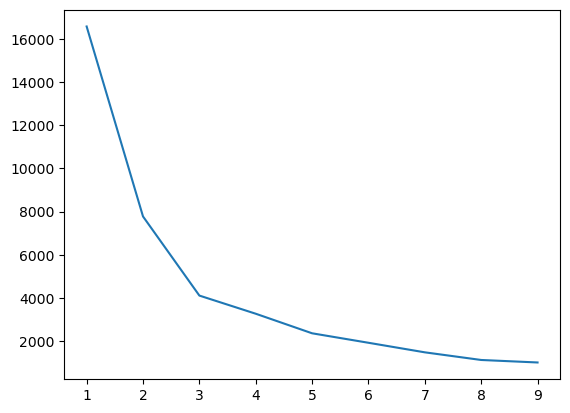

In [10]:
#적절한 K값을 찾기 위해 Elbow Method 적용
from sklearn.cluster import KMeans

KS = range(1,10)
distortions = []

for k in KS:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(df_pca)
    distortions.append(kmeanmodel.inertia_)

plt.plot(KS, distortions)

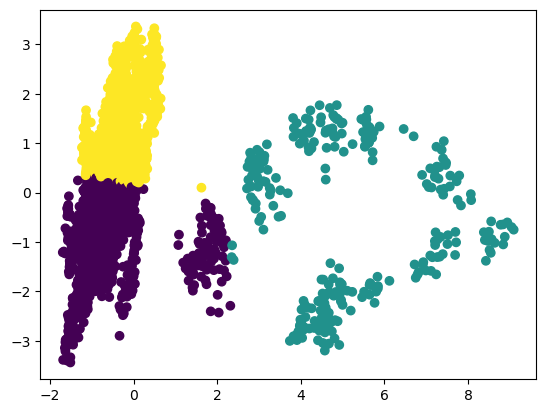

In [11]:
#K = 3를 이용하여 KMeans 알고리즘 수행
kmeanmodel = KMeans(n_clusters=3)
kmeanmodel.fit(df_pca)
df_pca['Cluster'] = kmeanmodel.labels_
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeanmodel.labels_)

#각 Cluster별로 가장 많이 들어있는 지역이 그 Cluster에 속해있는 것으로 간주.

In [12]:
df['Cluster'] = df_pca['Cluster']
df_cluster1 = df.loc[df['Cluster'] == 0, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
7     150
8     138
17    138
6     135
4     134
5     132
3     119
11    114
16    110
12    104
2      99
1      91
15     66
13     65
10     60
14     22
Name: count, dtype: int64


In [13]:
df_cluster1 = df.loc[df['Cluster'] == 1, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
9    193
1    101
Name: count, dtype: int64


In [14]:
df_cluster1 = df.loc[df['Cluster'] == 2, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
14    171
10    133
13    128
15    127
2      94
12     89
16     83
11     79
3      74
5      61
4      59
6      58
17     55
7      43
1       1
8       1
Name: count, dtype: int64


In [15]:
#KMeans Clusturing 결과 : 

#Cluster 1
#서울특별시, 경기도

#Cluster 2
#울산광역시, 제주특별자치도, 세종특별자치시, 대전광역시, 인천광역시, 광주광역시, 대구광역시,충청북도, 경상남도, 충청남도, 부산광역시

#Cluster 3
#전라남도, 강원특별자치도, 전라북도, 경상북도